# Solving a Partial Differential Equation (PDEs) using a Physics-Informed Neural Network (PINN)
Let's solve the following ODE as an example:

$$-\frac{d^2u}{dx^2} = f(x), \quad x \in (0,1)$$​
$$ u(0) = 0, \quad u(1) = 0 $$​



This is an exponential decay problem, whose solution is
$$u^* = \sin(2\pi x)$$
$$f = 4\pi^2 \sin(2\pi x)$$


**Step 1: Define the Neural Network**

Create a neural network that takes temporal coordinates as inputs and outputs the solution to the PDE at those points. Ensure that the network has enough capacity (layers and neurons) to capture the complexity of the solution.

In [37]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class PDE_Net(nn.Module):
    def __init__(self):
        super(PDE_Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 20),
            nn.Tanh(),
            nn.Linear(20, 20),
            nn.Tanh(),
            nn.Linear(20, 20),
            nn.Tanh(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.net(x)

In [38]:
def eval_loss_pde(u_pred, x, f):
  dudx = torch.autograd.grad(u_pred, x, grad_outputs=torch.ones_like(u_pred), create_graph=True)[0]
  d2udxx = torch.autograd.grad(dudx, x, grad_outputs=torch.ones_like(u_pred), create_graph=True)[0]
  # PDE residual (- d2udxx = f)
  loss_pde = ((-d2udxx - f).pow(2)).mean()
  return loss_pde

def eval_loss_bc(u_pred_0, u_pred_1, u_bc_0, u_bc_1):
  # Enforce the initial condition
  loss_bc = (u_pred_0 - u_bc_0).pow(2) + (u_pred_1 - u_bc_1).pow(2)
  return loss_bc

def analytical_u(x):
  pi = torch.acos(torch.zeros(1)).item() * 2
  return torch.sin(2*pi*x)

def rhs_f(x):
  pi = torch.acos(torch.zeros(1)).item() * 2
  return 4*pi**2*torch.sin(2*pi*x)

def compute_relative_l2_error(u_pred, u_true):
  return np.linalg.norm(u_pred-u_true, ord=2)/np.linalg.norm(u_true, ord=2)

def compute_l2_error(u_pred, u_true):
  return np.linalg.norm(u_pred-u_true, ord=2)

Epoch [ 100/10000], Total Loss: 9.1186e+01  PDE Loss: 6.1118e+01  BC Loss: 3.0068e+01
Epoch [ 200/10000], Total Loss: 4.6473e+01  PDE Loss: 1.2760e+01  BC Loss: 3.3713e+01
Epoch [ 300/10000], Total Loss: 3.0782e+01  PDE Loss: 4.5021e+00  BC Loss: 2.6280e+01
Epoch [ 400/10000], Total Loss: 2.3449e+01  PDE Loss: 4.8689e+00  BC Loss: 1.8580e+01
Epoch [ 500/10000], Total Loss: 1.8482e+01  PDE Loss: 3.9423e+00  BC Loss: 1.4539e+01
Epoch [ 600/10000], Total Loss: 1.1366e+01  PDE Loss: 1.2154e+00  BC Loss: 1.0150e+01
Epoch [ 700/10000], Total Loss: 6.7529e+00  PDE Loss: 7.3851e-01  BC Loss: 6.0144e+00
Epoch [ 800/10000], Total Loss: 4.6836e+00  PDE Loss: 6.2892e-01  BC Loss: 4.0547e+00
Epoch [ 900/10000], Total Loss: 3.3249e+00  PDE Loss: 4.9989e-01  BC Loss: 2.8250e+00
Epoch [1000/10000], Total Loss: 2.3790e+00  PDE Loss: 3.9801e-01  BC Loss: 1.9809e+00
Epoch [1100/10000], Total Loss: 1.6856e+00  PDE Loss: 3.1294e-01  BC Loss: 1.3727e+00
Epoch [1200/10000], Total Loss: 1.1227e+00  PDE Loss: 

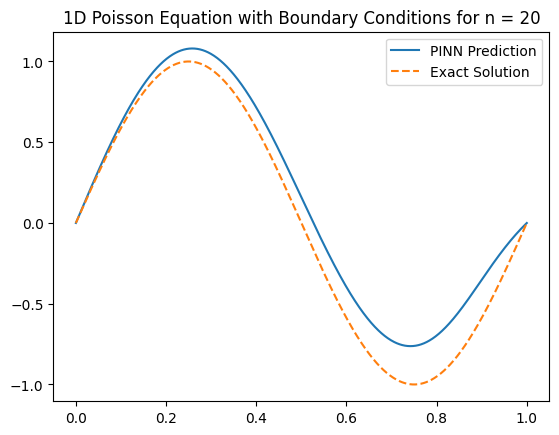

Epoch [ 100/10000], Total Loss: 7.3773e+01  PDE Loss: 3.1539e+01  BC Loss: 4.2234e+01
Epoch [ 200/10000], Total Loss: 5.1264e+01  PDE Loss: 1.4202e+01  BC Loss: 3.7061e+01
Epoch [ 300/10000], Total Loss: 3.9237e+01  PDE Loss: 7.8457e+00  BC Loss: 3.1391e+01
Epoch [ 400/10000], Total Loss: 3.4928e+01  PDE Loss: 7.5326e+00  BC Loss: 2.7395e+01
Epoch [ 500/10000], Total Loss: 3.0316e+01  PDE Loss: 4.8792e+00  BC Loss: 2.5437e+01
Epoch [ 600/10000], Total Loss: 2.6820e+01  PDE Loss: 3.5714e+00  BC Loss: 2.3248e+01
Epoch [ 700/10000], Total Loss: 2.4457e+01  PDE Loss: 2.7833e+00  BC Loss: 2.1673e+01
Epoch [ 800/10000], Total Loss: 2.1112e+01  PDE Loss: 1.8889e+00  BC Loss: 1.9223e+01
Epoch [ 900/10000], Total Loss: 1.7634e+01  PDE Loss: 2.4578e+00  BC Loss: 1.5176e+01
Epoch [1000/10000], Total Loss: 1.6499e+01  PDE Loss: 3.5465e+00  BC Loss: 1.2953e+01
Epoch [1100/10000], Total Loss: 1.1274e+01  PDE Loss: 1.3131e+00  BC Loss: 9.9608e+00
Epoch [1200/10000], Total Loss: 5.2246e+00  PDE Loss: 

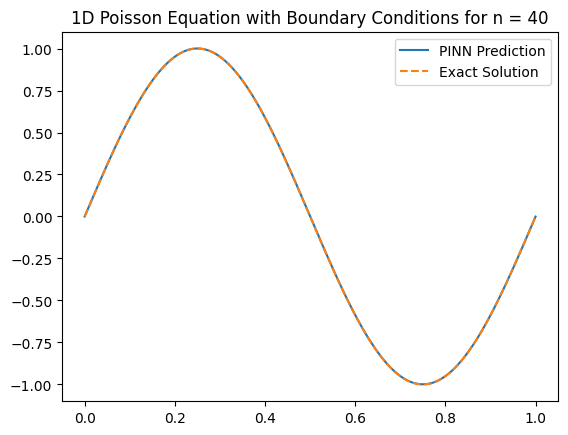

Epoch [ 100/10000], Total Loss: 7.2092e+01  PDE Loss: 3.6551e+01  BC Loss: 3.5540e+01
Epoch [ 200/10000], Total Loss: 5.3268e+01  PDE Loss: 1.6896e+01  BC Loss: 3.6372e+01
Epoch [ 300/10000], Total Loss: 3.9229e+01  PDE Loss: 9.5712e+00  BC Loss: 2.9658e+01
Epoch [ 400/10000], Total Loss: 3.2119e+01  PDE Loss: 6.1562e+00  BC Loss: 2.5963e+01
Epoch [ 500/10000], Total Loss: 2.9091e+01  PDE Loss: 5.3794e+00  BC Loss: 2.3711e+01
Epoch [ 600/10000], Total Loss: 2.6809e+01  PDE Loss: 4.2704e+00  BC Loss: 2.2539e+01
Epoch [ 700/10000], Total Loss: 2.5195e+01  PDE Loss: 3.9976e+00  BC Loss: 2.1197e+01
Epoch [ 800/10000], Total Loss: 2.2450e+01  PDE Loss: 3.2963e+00  BC Loss: 1.9154e+01
Epoch [ 900/10000], Total Loss: 1.5264e+01  PDE Loss: 1.7821e+00  BC Loss: 1.3482e+01
Epoch [1000/10000], Total Loss: 6.9089e+00  PDE Loss: 2.5543e-01  BC Loss: 6.6535e+00
Epoch [1100/10000], Total Loss: 4.4982e+00  PDE Loss: 5.3455e-01  BC Loss: 3.9637e+00
Epoch [1200/10000], Total Loss: 3.2497e+00  PDE Loss: 

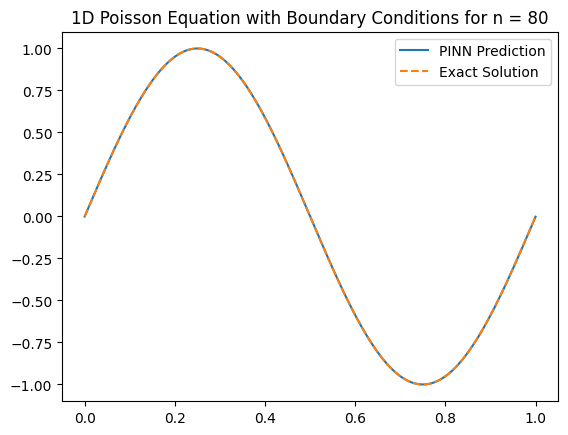

Epoch [ 100/10000], Total Loss: 7.6213e+01  PDE Loss: 4.3348e+01  BC Loss: 3.2865e+01
Epoch [ 200/10000], Total Loss: 4.9663e+01  PDE Loss: 1.4024e+01  BC Loss: 3.5639e+01
Epoch [ 300/10000], Total Loss: 3.8656e+01  PDE Loss: 9.0319e+00  BC Loss: 2.9624e+01
Epoch [ 400/10000], Total Loss: 3.2781e+01  PDE Loss: 6.4977e+00  BC Loss: 2.6283e+01
Epoch [ 500/10000], Total Loss: 2.8434e+01  PDE Loss: 5.3437e+00  BC Loss: 2.3090e+01
Epoch [ 600/10000], Total Loss: 2.5526e+01  PDE Loss: 3.9514e+00  BC Loss: 2.1574e+01
Epoch [ 700/10000], Total Loss: 1.9426e+01  PDE Loss: 2.6453e+00  BC Loss: 1.6781e+01
Epoch [ 800/10000], Total Loss: 1.0511e+01  PDE Loss: 7.1106e-01  BC Loss: 9.8003e+00
Epoch [ 900/10000], Total Loss: 5.2792e+00  PDE Loss: 3.3027e-01  BC Loss: 4.9490e+00
Epoch [1000/10000], Total Loss: 2.9207e+00  PDE Loss: 3.2270e-01  BC Loss: 2.5980e+00
Epoch [1100/10000], Total Loss: 1.6326e+00  PDE Loss: 2.4279e-01  BC Loss: 1.3898e+00
Epoch [1200/10000], Total Loss: 7.9708e-01  PDE Loss: 

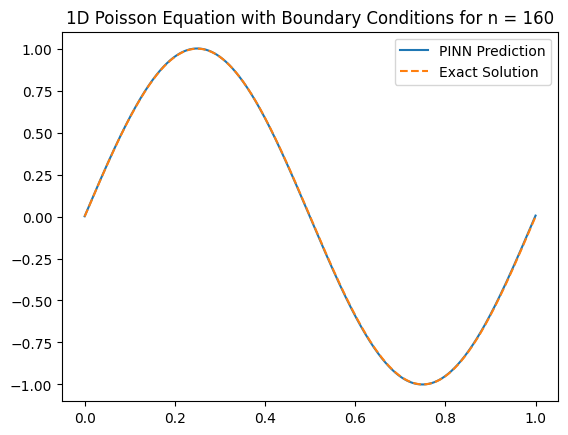

Epoch [ 100/10000], Total Loss: 9.5467e+01  PDE Loss: 6.6277e+01  BC Loss: 2.9190e+01
Epoch [ 200/10000], Total Loss: 4.8528e+01  PDE Loss: 1.2811e+01  BC Loss: 3.5717e+01
Epoch [ 300/10000], Total Loss: 3.9003e+01  PDE Loss: 9.1796e+00  BC Loss: 2.9823e+01
Epoch [ 400/10000], Total Loss: 3.3355e+01  PDE Loss: 6.4003e+00  BC Loss: 2.6954e+01
Epoch [ 500/10000], Total Loss: 2.9474e+01  PDE Loss: 4.9202e+00  BC Loss: 2.4554e+01
Epoch [ 600/10000], Total Loss: 2.6520e+01  PDE Loss: 3.5465e+00  BC Loss: 2.2974e+01
Epoch [ 700/10000], Total Loss: 2.3989e+01  PDE Loss: 2.8877e+00  BC Loss: 2.1102e+01
Epoch [ 800/10000], Total Loss: 2.0915e+01  PDE Loss: 3.0571e+00  BC Loss: 1.7858e+01
Epoch [ 900/10000], Total Loss: 1.9992e+01  PDE Loss: 3.8247e+00  BC Loss: 1.6167e+01
Epoch [1000/10000], Total Loss: 1.9602e+01  PDE Loss: 3.8772e+00  BC Loss: 1.5725e+01
Epoch [1100/10000], Total Loss: 1.9139e+01  PDE Loss: 3.6905e+00  BC Loss: 1.5448e+01
Epoch [1200/10000], Total Loss: 1.2927e+01  PDE Loss: 

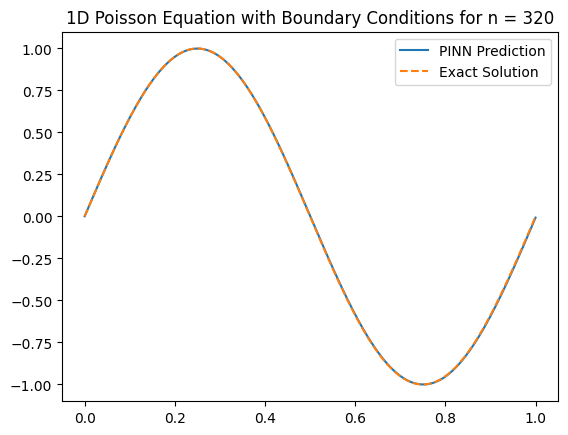

In [39]:
Relative_L2_Errors = []
L2_Errors = []

# Define the domain
num_train_points = [20, 40, 80, 160, 320]

for i in range(len(num_train_points)):

  x = torch.rand([num_train_points[i], 1])  # Samples points

  # define the Dirichlet nodes
  x0 = torch.tensor([[0.0]])
  x1 = torch.tensor([[1.0]])

  # Provide bounday conditions
  u_bc_0 = torch.tensor([[0.0]])  # boundary condition
  u_bc_1 = torch.tensor([[0.0]])  # boundary condition

  # compute the rhs
  f = rhs_f(x)

  model = PDE_Net()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  num_epochs = 10000

  losses = []
  losses_pde = []
  losses_bcs = []

  for epoch in range(num_epochs):
    x.requires_grad = True

    # predict in the interior part
    u_pred = model(x)
    loss_pde = eval_loss_pde(u_pred, x, f)

    # predict the initial condition
    u_pred_0 = model(x0)  # u(0)
    u_pred_1 = model(x1)  # u(1)

    loss_bc = eval_loss_bc(u_pred_0, u_pred_1, u_bc_0, u_bc_1)

    # add all loss componenets
    total_loss = loss_pde + loss_bc

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    losses.append(total_loss.item())
    losses_pde.append(loss_pde.item())
    losses_bcs.append(loss_bc.item())

    if (epoch+1) % 100 == 0:
      print ('Epoch [{:4d}/{:4d}], Total Loss: {:.4e}  PDE Loss: {:.4e}  BC Loss: {:.4e}'.format(
              epoch+1, num_epochs, total_loss.item(), loss_pde.item(), loss_bc.item()))

    x_test = torch.linspace(0, 1, 1000).unsqueeze(1)  # Evaluate from 0 to 1
    u_pred = model(x_test).detach().numpy()
    u_exact = analytical_u(x_test).detach().numpy()

  Relative_L2_Errors.append(compute_relative_l2_error(u_pred, u_exact))
  L2_Errors.append(compute_l2_error(u_pred, u_exact))
  print("Relative L2 Error at {} = {}".format(num_train_points[i], Relative_L2_Errors[i]))
  print("L2 Error at {} = {}".format(num_train_points[i], L2_Errors[i]))
  plt.plot(x_test.numpy(), u_pred, label='PINN Prediction')
  plt.plot(x_test.numpy(), u_exact, label='Exact Solution', linestyle='--')
  plt.legend()
  plt.title('1D Poisson Equation with Boundary Conditions for n = {}'.format(num_train_points[i]))
  plt.savefig('1D_Poisson_n_{}.png'.format(num_train_points[i]))
  plt.show()

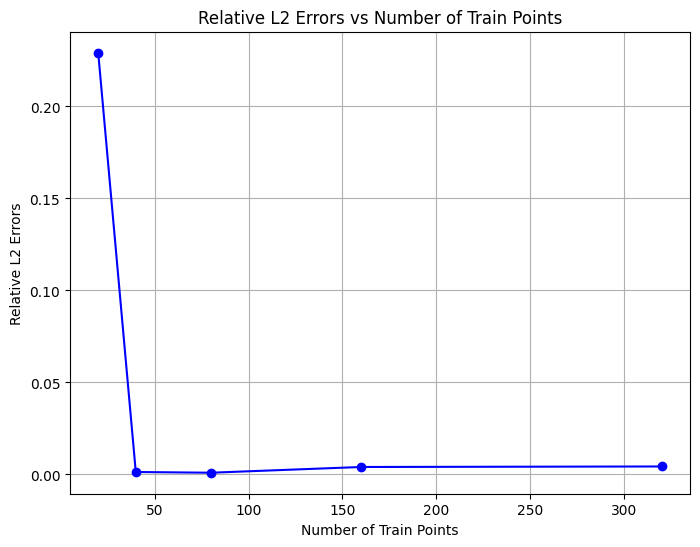

In [42]:
# Plot Relative_L2_Errors vs num_train_points
plt.figure(figsize=(8, 6))
plt.plot(num_train_points, Relative_L2_Errors, marker='o', linestyle='-', color='b')
plt.title('Relative L2 Errors vs Number of Train Points')
plt.xlabel('Number of Train Points')
plt.ylabel('Relative L2 Errors')
plt.grid(True)
plt.savefig('1D_Poisson_Rel_L2_Norm.png')
plt.show()

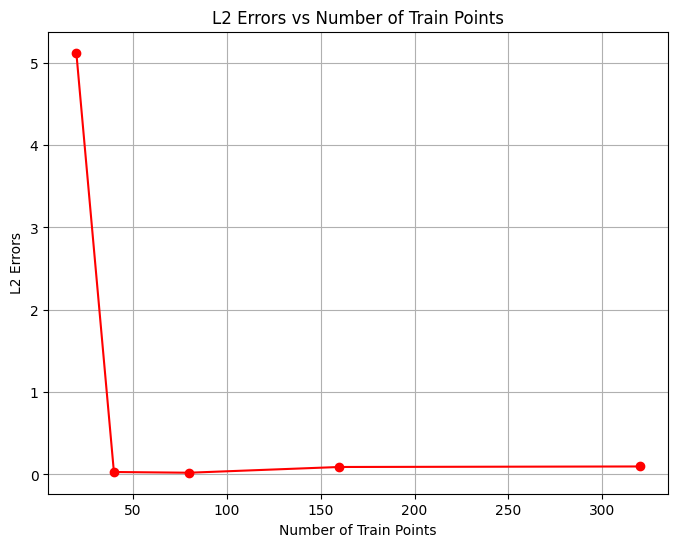

In [41]:
# Plot L2_Errors vs num_train_points
plt.figure(figsize=(8, 6))
plt.plot(num_train_points, L2_Errors, marker='o', linestyle='-', color='r')
plt.title('L2 Errors vs Number of Train Points')
plt.xlabel('Number of Train Points')
plt.ylabel('L2 Errors')
plt.grid(True)
plt.savefig('1D_Poisson_L2_Norm.png')
plt.show()